In [99]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))



['Interview.xlsx', 'Interview.csv']


# SUMMARY

This is a classification problem, which candidates are going to show up and which ones not.  As a secondary goal, we can show which features are the most significant, something that also will provide some intuition if the model is right or not. 

The dataset is not huge, and mostly all the features are categorical. A priori,  I will bet for, LR, RF or Bayesian as good models for this job.  LR and RF can easily provide insights about the most important features. 

The data needed a lot of cleaning, specially unify format. Also, I transformed the date, to get the day of the week, a more informative feature in this case, in my opinion.  
Some features have missing information (Na, or Not sure, Not yet, or just missing, no answered ....) As you will see below, drop those features with a lot of do not knows, it is not good an idea. However, in some features, Not yet is informative, in others is just equivalent to NO. Then, this needs some special preprocessing, and any decision in that regard is likely to affect the performance of the model.  I did a quick modeling, so far, the prediction score is horrible, potentially the skillset feature it may help, but as I mentioned before, cleaning that column needs some serious job. Also, some tuning in the hyperparameters of the model it may help but I am not optimistic about it.  
So far, the most important feature is if there is necessary permission to start or not. So, this makes kind of sense, we are going in the right direction... Sometimes, we can fill a missing value using imputation methods and improve the performance of the model. In this case, we do not have a lot of cases, nevertheless,  looks like the candidates are sort of similar, however,  when I remove the candidates with NA on this feature, the model does not improve significantly. 


## "best" results


Train/Test split results:

LogisticRegression accuracy is 0.718

LogisticRegression log_loss is 0.569

LogisticRegression auc is 0.70

    


## Explore & Preprocessing Dataset

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option("display.max_colwidth", 120)
pd.set_option('mode.chained_assignment', None)
pd.set_option('io.hdf.default_format','table')

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=2)

In [101]:
#  first look
interviews = pd.read_csv('../input/Interview.csv')

In [102]:
interviews.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


In [103]:
interviews.describe()

,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [104]:
#remove empty columns
interviews = interviews.drop(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'], axis=1)

In [105]:
#check column names
interviews.columns

Index(['Date of Interview', 'Client name', 'Industry', 'Location', 'Position to be closed', 'Nature of Skillset', 'Interview Type', 'Name(Cand ID)', 'Gender', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue', 'Candidate Native location', 'Have you obtained the necessary permission to start at the required time', 'Hope there will be no unscheduled meetings', 'Can I Call you three hours before the interview and follow up on your attendance for the interview', 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much', 'Have you taken a printout of your updated resume. Have you read the JD and understood the same', 'Are you clear with the venue details and the landmark.', 'Has the call letter been shared', 'Expected Attendance', 'Observed Attendance', 'Marital Status'], dtype='object')

 **NOTES**
 
* mostly categorical features
* Long names, difficult to handle, need to be addressed 


In [106]:
# let's do a quick look into the features 
for c in interviews.columns:
    print(c)
    print(interviews[c].unique())

Date of Interview
['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '04/12/16'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15 Apr 16' '19 Apr 16' '20 Apr 16' '21-Apr -16'
 '22 -Apr -16' '25 – Apr-16' '25 Apr 16' '18 Apr 16' '11.5.16' '10.5.16'
 '11.05.16' '12.04.2016' '12.04.2017' '12.04.2018' '12.04.2019'
 '12.04.2020' '12.04.2021' '12.04.2022' '12.04.2023' '8.5.16' '7.5.16'
 '19.03.16' '24.05.2016' '05/11/2016' '26/05/2016' '10.05.2016'
 '28.08.2016 & 09.00 AM' '28.08.2016 & 9.30 AM' '28.8.2016 & 12.00 PM'
 '28.08.2016 & 09.30 AM' '28.8.2016 & 10.30 AM' '28.8.2016 & 09.30 AM'
 '28.8.2016 & 04.00 PM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 03.00 PM' '28.08.2016 & 10.00 AM'
 '28.8.2016 & 02.00 PM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2

**NOTES**

* in general all the features are messy, 
* differents date formats
* no unified format for yes and no (YES, Yes, yes... etc..)




In [107]:
#rename col
newnames = {
    'Have you obtained the necessary permission to start at the required time':'permission',
    'Hope there will be no unscheduled meetings':'meetings',
    'Can I Call you three hours before the interview and follow up on your attendance for the interview':'follow up call',
    'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much':'alternative number',
    'Have you taken a printout of your updated resume. Have you read the JD and understood the same':'printout',
    'Are you clear with the venue details and the landmark.':'venue details',
    'Has the call letter been shared':'shared letter',
    'Nature of Skillset':'skillset',
    'Position to be closed':'position'
}
interviews.rename(columns=newnames, inplace=True)


In [108]:
interviews.columns

Index(['Date of Interview', 'Client name', 'Industry', 'Location', 'position', 'skillset', 'Interview Type', 'Name(Cand ID)', 'Gender', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue', 'Candidate Native location', 'permission', 'meetings', 'follow up call', 'alternative number', 'printout', 'venue details', 'shared letter', 'Expected Attendance', 'Observed Attendance', 'Marital Status'], dtype='object')

In [109]:
interviews.fillna('NA', inplace=True)

In [110]:
#unify criteria , YES, NO, NA
# quick and dirty solution
def unify_ans(row):
    
    string = row.upper()
        
    if 'NA' in string:
        return 'NA'

    if 'NOT SURE' in string or 'CANT SAY' in string or 'YET' in string:
        return 'UNCERTAIN'
    
    if 'NO' in string or 'CHECK' in string:
        return 'NO'
    if 'YES' in string:
        return 'YES'
    
    print(row)
    return 'NA'
    

In [111]:
# test cleaning function
temp = interviews.copy()
temp['permission'] = temp['permission'].apply(unify_ans)

In [112]:
newnames.values()

dict_values(['permission', 'meetings', 'follow up call', 'alternative number', 'printout', 'venue details', 'shared letter', 'skillset', 'position'])

In [113]:

for c in ['Observed Attendance','permission', 'meetings', 'follow up call', 'alternative number', 'printout', 'venue details', 'shared letter']:
    interviews[c] = interviews[c].apply(unify_ans)

In [114]:
# let's do a quick look into the features 
for c in interviews.columns:
    print(c)
    print(interviews[c].unique())

Date of Interview
['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '04/12/16'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15 Apr 16' '19 Apr 16' '20 Apr 16' '21-Apr -16'
 '22 -Apr -16' '25 – Apr-16' '25 Apr 16' '18 Apr 16' '11.5.16' '10.5.16'
 '11.05.16' '12.04.2016' '12.04.2017' '12.04.2018' '12.04.2019'
 '12.04.2020' '12.04.2021' '12.04.2022' '12.04.2023' '8.5.16' '7.5.16'
 '19.03.16' '24.05.2016' '05/11/2016' '26/05/2016' '10.05.2016'
 '28.08.2016 & 09.00 AM' '28.08.2016 & 9.30 AM' '28.8.2016 & 12.00 PM'
 '28.08.2016 & 09.30 AM' '28.8.2016 & 10.30 AM' '28.8.2016 & 09.30 AM'
 '28.8.2016 & 04.00 PM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 03.00 PM' '28.08.2016 & 10.00 AM'
 '28.8.2016 & 02.00 PM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2

**NOTES**

* column industry; merge IT 
* On Location, Candidate Current Location, Candidate Job Location, Interview Venue & Candidate Native location 
  do strip and uppercase
* skillset really messy unification strip uppercase.. group by similar? ... so far, I won't use itm and see what I can get with the rest of the feautres


** CLEANING **

Specific features, unify format

In [115]:
# more specific cleaning
#Interview Type
#['Scheduled Walkin' 'Scheduled ' 'Walkin' 'Scheduled Walk In'
# 'Sceduled walkin' 'Walkin ' 'NA']
for idx,row in enumerate(interviews['Interview Type']):
    string = row.upper()
    
    if 'ULED WALK' in string:
        interviews['Interview Type'].iloc[idx] = 'SCHEDULED WALKIN'
    elif 'WALK' in string:
        interviews['Interview Type'].iloc[idx] = 'WALKIN'
    else:
        interviews['Interview Type'].iloc[idx] = string

In [116]:
interviews['Interview Type'].value_counts()

SCHEDULED WALKIN    646
SCHEDULED           371
WALKIN              216
NA                    1
Name: Interview Type, dtype: int64

**NOTES**

* industry merge IT 
 
* strip and uppercase
Location, Candidate Current Location, Candidate Job Location, Interview Venue & Candidate Native location 


In [117]:
for c in ['Location', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue' , 'Candidate Native location']:
    for idx,row in enumerate(interviews[c]):
        string = row.upper().strip('-').strip()
        interviews[c].iloc[idx] = string
        

In [118]:
for c in ['Location', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue' , 'Candidate Native location']:
    print(interviews[c].unique())

['CHENNAI' 'GURGAON' 'BANGALORE' 'HYDERABAD' 'GURGAONR' 'DELHI' 'COCHIN-'
 'NOIDA' 'NA']
['CHENNAI' 'GURGAON' 'BANGALORE' 'HYDERABAD' 'DELHI' 'COCHIN-' 'NOIDA' 'NA']
['HOSUR' 'BANGALORE' 'CHENNAI' 'GURGAON' 'VISAKAPATINAM' 'COCHIN-' 'NOIDA'
 'NA']
['HOSUR' 'GURGAON' 'BANGALORE' 'CHENNAI' 'HYDERABAD' 'COCHIN-' 'NOIDA' 'NA']
['HOSUR' 'TRICHY' 'CHENNAI' 'GURGAON' 'NOIDA' 'DELHI /NCR' 'COCHIN'
 'TRIVANDRUM' 'BANGALORE' 'COIMBATORE' 'SALEM' 'TANJORE' 'HYDERABAD'
 'MUMBAI' 'PUNE' 'KOLKATA' 'ALLAHABAD' 'PANJIM' 'CUTTACK' 'VISAKAPATINAM'
 'BELGAUM' 'PATNA' 'CHITOOR' 'ANANTAPUR' 'WARANGAL' 'AHMEDABAD' 'KURNOOL'
 'VIJAYAWADA' 'VELLORE' 'PONDICHERRY' 'NAGERCOIL' 'AGRA' 'BHUBANESHWAR'
 'GHAZIABAD' 'BADDI' 'TUTICORIN' 'TIRUPATI' 'FAIZABAD' 'AMBUR' 'CHANDIGARH'
 'MYSORE' 'HISSAR' 'DELHI' 'KANPUR' 'LUCKNOW' 'COCHIN-' 'NA']


In [119]:
for idx,row in enumerate(interviews['Industry']):
    string = row.upper()
    
    if 'IT' in string:
        interviews[c].iloc[idx] = 'IT'

NOTES

**CLEANING DATE COLUMN**

here something like dateparser will come really handy, however I belive I cannot installed
so .... let see what we can do. 

In [120]:
interviews['Date of Interview'].unique()

array(['13.02.2015', '19.06.2015', '23.06.2015', '29.06.2015',
       '25.06.2015', '25.05.16', '25.5.2016', '25-05-2016', '25.05.2016',
       '25-5-2016', '04/12/16', '13.04.2016', '27.02.2016', '07.05.2016',
       '5.5.16', '4.5.16', '21.4.16', '22.4.16', '23.4.16', '15 Apr 16',
       '19 Apr 16', '20 Apr 16', '21-Apr -16', '22 -Apr -16',
       '25 – Apr-16', '25 Apr 16', '18 Apr 16', '11.5.16', '10.5.16',
       '11.05.16', '12.04.2016', '12.04.2017', '12.04.2018', '12.04.2019',
       '12.04.2020', '12.04.2021', '12.04.2022', '12.04.2023', '8.5.16',
       '7.5.16', '19.03.16', '24.05.2016', '05/11/2016', '26/05/2016',
       '10.05.2016', '28.08.2016 & 09.00 AM', '28.08.2016 & 9.30 AM',
       '28.8.2016 & 12.00 PM', '28.08.2016 & 09.30 AM',
       '28.8.2016 & 10.30 AM', '28.8.2016 & 09.30 AM',
       '28.8.2016 & 04.00 PM', '28.08.2016 & 11.30 AM',
       '28.08.2016 & 11.00 AM', '28.08.2016 & 10.30 AM',
       '28.8.2016 & 03.00 PM', '28.08.2016 & 10.00 AM',
       '28.8.20

In [121]:
import datetime

In [122]:
a = datetime.date(2018,3, 4)
a.weekday()

6

In [123]:
# I belive the most important factor in the date is day of the week mounth and year. 
# So I going to extract only those
# there are some date set on the future... not sure if those are typos
# 
def fix_dates(row):
    
    if row == 'NA':
        return 'NA','NA','NA','NA'
    else:
        pass

        string  = row.replace(" ", "")
        string  = string.replace("–", "-")

        if '&' in string:
            string = string.split('&')[0]
            
        if '.' in string:
            d, m , y = string.split('.')
        elif '/' in string:
            d, m , y = string.split('/')
        elif '-' in string:
            d, m , y = string.split('-')
        else:
            d, y = string.split('Apr')
            m = 4

        d = int(d)
        y = int(y)
        if y < 2000:
            y = y + 2000
        if m =='Apr':
             m = 4
        else:
            m = int(m)

        a = datetime.date(y,m, d)
        w = a.weekday()

        return w,d,m,y

    

In [124]:
interviews['weekday'],interviews['day'],interviews['month'],interviews['year'] = zip(*interviews['Date of Interview'].apply(fix_dates))

In [125]:
interviews.head(5)

,Date of Interview,Client name,Industry,Location,position,skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,permission,meetings,follow up call,alternative number,printout,venue details,shared letter,Expected Attendance,Observed Attendance,Marital Status,weekday,day,month,year
0,13.02.2015,Hospira,Pharmaceuticals,CHENNAI,Production- Sterile,Routine,SCHEDULED WALKIN,Candidate 1,Male,CHENNAI,HOSUR,HOSUR,HOSUR,YES,YES,YES,YES,YES,YES,YES,Yes,NO,Single,4,13,2,2015
1,13.02.2015,Hospira,Pharmaceuticals,CHENNAI,Production- Sterile,Routine,SCHEDULED WALKIN,Candidate 2,Male,CHENNAI,BANGALORE,HOSUR,TRICHY,YES,YES,YES,YES,YES,YES,YES,Yes,NO,Single,4,13,2,2015
2,13.02.2015,Hospira,Pharmaceuticals,CHENNAI,Production- Sterile,Routine,SCHEDULED WALKIN,Candidate 3,Male,CHENNAI,CHENNAI,HOSUR,CHENNAI,NA,NA,NA,NA,NA,NA,NA,Uncertain,NO,Single,4,13,2,2015
3,13.02.2015,Hospira,Pharmaceuticals,CHENNAI,Production- Sterile,Routine,SCHEDULED WALKIN,Candidate 4,Male,CHENNAI,CHENNAI,HOSUR,CHENNAI,YES,YES,NO,YES,NO,YES,YES,Uncertain,NO,Single,4,13,2,2015
4,13.02.2015,Hospira,Pharmaceuticals,CHENNAI,Production- Sterile,Routine,SCHEDULED WALKIN,Candidate 5,Male,CHENNAI,BANGALORE,HOSUR,CHENNAI,YES,YES,YES,NO,YES,YES,YES,Uncertain,NO,Married,4,13,2,2015


In [126]:
interviews.shape

(1234, 27)

## Models

the data is not perfect, but good enought to do some tests. However, first I will do. One hot encoding for Categorical features. The idea is to figure out which is the best use of the  features , and decide if we really need skillset. 

In [127]:
mldata = interviews.copy()

In [128]:
mldata['Marital Status'].replace({'Single':0, 'Married':1, 'NA':np.nan}, inplace=True)
mldata['Gender'].replace({'Female':0, 'Male':1, 'NA':np.nan}, inplace=True)


In [129]:
mldata['Gender'].value_counts()

1.0    965
0.0    268
Name: Gender, dtype: int64

In [130]:
# remove missing attendace
mldata = mldata[mldata['Observed Attendance']!='NA']

In [131]:
mldata.replace('NA', np.nan, inplace=True)

In [132]:
#  missing values per candidates
mldata.isnull().sum(axis=1)

0       0
1       0
2       7
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [133]:
# missing values per features
mldata.isnull().sum(axis=0)

Date of Interview               0
Client name                     0
Industry                        0
Location                        0
position                        0
skillset                        0
Interview Type                  0
Name(Cand ID)                   0
Gender                          0
Candidate Current Location      0
Candidate Job Location          0
Interview Venue                 0
Candidate Native location       0
permission                    209
meetings                      267
follow up call                267
alternative number            267
printout                      268
venue details                 268
shared letter                 265
Expected Attendance             5
Observed Attendance             0
Marital Status                  0
weekday                         0
day                             0
month                           0
year                            0
dtype: int64

**NOTES**

On those 7 features, NA correspond to not sure, or not yet... so on that cases, NA can be cosnidered information. However, let's see what happen when we remove them

In [134]:
trimdataset = mldata.copy()
for c in ['permission', 'meetings', 'follow up call','alternative number','printout', 'venue details', 'shared letter']:
    del trimdataset[c]

In [135]:
# missinig 
# 'Observed Attendance','permission', 'meetings', 'follow up call', 'alternative number', 'printout', 'venue details', 'shared letter']
# category columns
cat = ['Client name', 
       'Industry', 
       'Location', 
       'position',
       'Interview Type',
       'Candidate Current Location', 
       'Candidate Job Location', 
       'Interview Venue', 
       'Candidate Native location',
      'weekday','month',]

pref = ['Clnt','Ind', 'Loc', 'Pos', 'Itype', 'Cc_loc', 'Cj_loc', 'Iv', 'Cn_loc','W','M' ]

#DUMMYFY
trimdataset = pd.get_dummies(trimdataset, columns=cat, prefix=pref)

In [136]:
trimdataset['Observed Attendance'].replace({'YES':1,'NO':0}, inplace=True)

In [137]:
sel_features = list()
for c in trimdataset:
    if c in ['Date of Interview', 'skillset', 'Name(Cand ID)',   'Expected Attendance', 'Observed Attendance', 'weekday','month','year' ]:
        pass
    else:
        sel_features.append(c)

In [138]:
len(sel_features)

121

In [139]:
# shuffle and split
trimdataset = trimdataset.sample(frac=1)
msk = np.random.rand(len(trimdataset)) < 0.8
train = trimdataset[msk]
test = trimdataset[~msk]

In [140]:
# quick function to eval models

def show_performance_model(model, X_train, y_train, X_test, y_test):
    # check classification scores of logistic regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
    print('Train/Test split results:')
    print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
    print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
    print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

    idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")


    print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
          "and a specificity of %.3f" % (1-fpr[idx]) + 
          ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))
    return

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import  cross_val_score


In [142]:
X_train = train[sel_features]
y_train = train['Observed Attendance']
X_test = test[sel_features]
y_test  = test['Observed Attendance']

Train/Test split results:
LogisticRegression accuracy is 0.671
LogisticRegression log_loss is 0.638
LogisticRegression auc is 0.506
Using a threshold of 0.538 guarantees a sensitivity of 0.962 and a specificity of 0.077, i.e. a false positive rate of 92.31%.


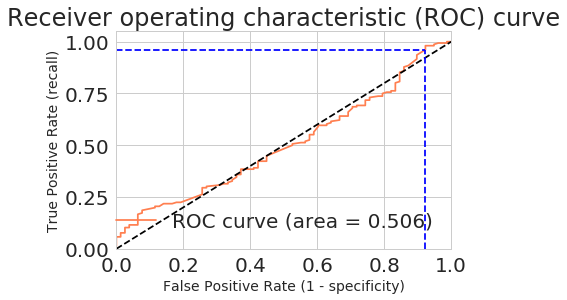

In [143]:

LR = LogisticRegression(C=0.1, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001)
show_performance_model(LR, X_train, y_train, X_test, y_test )

The Performance is horrible. Let's see  which features are doing best using RFECV.   This is one of the many ways of feature selection. Recursive feature elimination is an automated approach to this, others are listed in scikit.learn documentation. They have different pros and cons, and usually feature selection is best achieved by also involving common sense and trying models with different features. RFE is a quick way of selecting a good set of features, but does not necessarily give you the ultimately best.

In [144]:
Xtotal = trimdataset[sel_features]
ytotal = trimdataset['Observed Attendance']

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(Xtotal, ytotal)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

Optimal number of features: 13
Selected features: ['Clnt_ANZ', 'Clnt_Aon Hewitt', 'Clnt_Barclays', 'Clnt_Hospira', 'Ind_Telecom', 'Cj_loc_VISAKAPATINAM', 'Iv_HOSUR', 'Iv_HYDERABAD', 'Iv_NOIDA', 'Cn_loc_AHMEDABAD', 'Cn_loc_TRIVANDRUM', 'Cn_loc_VIJAYAWADA', 'W_0']


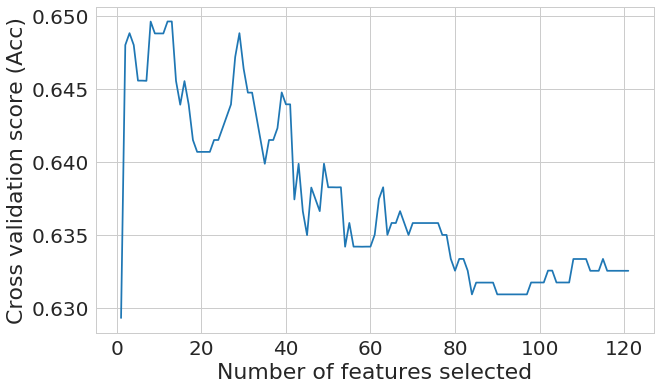

In [145]:
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(Xtotal.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (Acc)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

these features perform best in this model. It may  be informative, may be some companies have worst reputations than others, or the town of the candidates, AHMEDABAD, is not well connected, or far away. 
However, the performance is terrible, we are doing just a little bit than random, so let see what happen when we include the features I drop before. Somehow, those features may represent the interest of the candidate, let's see how it performes.

In [146]:
mldata = mldata.replace(np.nan,'NA')

# category columns
cat = ['Client name', 
       'Industry', 
       'Location', 
       'position',
       'Interview Type',
       'Candidate Current Location', 
       'Candidate Job Location', 
       'Interview Venue', 
       'Candidate Native location',
       'weekday',
       'month',
       'permission',
       'meetings',
       'follow up call',
       'alternative number',
       'printout',
       'venue details',
       'shared letter']

pref = ['Clnt','Ind', 'Loc', 'Pos', 'Itype', 'Cc_loc', 'Cj_loc', 'Iv', 'Cn_loc','W','M', 'Per', 'Mt', 'Fc',
'Al', 'Pr', 'V', 'Shl' ]

#DUMMYFY
alldataset = pd.get_dummies(mldata, columns=cat, prefix=pref)

In [147]:
alldataset['Observed Attendance'].replace({'YES':1,'NO':0}, inplace=True)

In [148]:
sel_features = list()
for c in alldataset:
    if c in ['Date of Interview', 'skillset', 'Name(Cand ID)',   'Expected Attendance', 'Observed Attendance', 'weekday','month','year' ]:
        pass
    else:
        sel_features.append(c)

        
 # use same mask  than before
train = alldataset[msk]
test = alldataset[~msk]

X_train = train[sel_features]
y_train = train['Observed Attendance']
X_test = test[sel_features]
y_test  = test['Observed Attendance']
#y = final_train['Survived']


In [149]:
X_train.head(10)

,Gender,Marital Status,day,Clnt_ANZ,Clnt_Aon Hewitt,Clnt_Aon hewitt Gurgaon,Clnt_Astrazeneca,Clnt_Barclays,Clnt_Flextronics,Clnt_Hewitt,Clnt_Hospira,Clnt_Pfizer,Clnt_Prodapt,Clnt_Standard Chartered Bank,Clnt_Standard Chartered Bank Chennai,Clnt_UST,Clnt_Williams Lea,Clnt_Woori Bank,Ind_BFSI,Ind_Electronics,Ind_IT,Ind_IT Products and Services,Ind_IT Services,Ind_Pharmaceuticals,Ind_Telecom,Loc_BANGALORE,Loc_CHENNAI,Loc_COCHIN-,Loc_DELHI,Loc_GURGAON,Loc_GURGAONR,Loc_HYDERABAD,Loc_NOIDA,Pos_AML,Pos_Dot Net,Pos_Niche,Pos_Production- Sterile,Pos_Routine,Pos_Selenium testing,Pos_Trade Finance,Itype_SCHEDULED,Itype_SCHEDULED WALKIN,Itype_WALKIN,Cc_loc_BANGALORE,Cc_loc_CHENNAI,Cc_loc_COCHIN-,Cc_loc_DELHI,Cc_loc_GURGAON,Cc_loc_HYDERABAD,Cc_loc_NOIDA,Cj_loc_BANGALORE,Cj_loc_CHENNAI,Cj_loc_COCHIN-,Cj_loc_GURGAON,Cj_loc_HOSUR,Cj_loc_NOIDA,Cj_loc_VISAKAPATINAM,Iv_BANGALORE,Iv_CHENNAI,Iv_COCHIN-,Iv_GURGAON,Iv_HOSUR,Iv_HYDERABAD,Iv_NOIDA,Cn_loc_AHMEDABAD,Cn_loc_ALLAHABAD,Cn_loc_AMBUR,Cn_loc_ANANTAPUR,Cn_loc_BADDI,Cn_loc_BANGALORE,Cn_loc_BELGAUM,Cn_loc_BHUBANESHWAR,Cn_loc_CHANDIGARH,Cn_loc_CHENNAI,Cn_loc_CHITOOR,Cn_loc_COCHIN,Cn_loc_COIMBATORE,Cn_loc_CUTTACK,Cn_loc_FAIZABAD,Cn_loc_GHAZIABAD,Cn_loc_GURGAON,Cn_loc_HOSUR,Cn_loc_HYDERABAD,Cn_loc_IT,Cn_loc_KOLKATA,Cn_loc_KURNOOL,Cn_loc_MUMBAI,Cn_loc_MYSORE,Cn_loc_NAGERCOIL,Cn_loc_NOIDA,Cn_loc_PANJIM,Cn_loc_PATNA,Cn_loc_PONDICHERRY,Cn_loc_PUNE,Cn_loc_SALEM,Cn_loc_TANJORE,Cn_loc_TIRUPATI,Cn_loc_TRICHY,Cn_loc_TRIVANDRUM,Cn_loc_TUTICORIN,Cn_loc_VELLORE,Cn_loc_VIJAYAWADA,Cn_loc_VISAKAPATINAM,Cn_loc_WARANGAL,W_0,W_1,W_2,W_3,W_4,W_5,W_6,M_1,M_2,M_3,M_4,M_5,M_6,M_8,M_9,M_11,M_12,Per_NA,Per_NO,Per_UNCERTAIN,Per_YES,Mt_NA,Mt_NO,Mt_UNCERTAIN,Mt_YES,Fc_NA,Fc_NO,Fc_YES,Al_NA,Al_NO,Al_YES,Pr_NA,Pr_NO,Pr_UNCERTAIN,Pr_YES,V_NA,V_NO,V_YES,Shl_NA,Shl_NO,Shl_UNCERTAIN,Shl_YES
0,1.0,0.0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
1,1.0,0.0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,1.0,0.0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
4,1.0,1.0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
5,1.0,0.0,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
6,1.0,0.0,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
7,0.0,0.0,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
8,1.0,0.0,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,

In [150]:
X_train.isnull().values.any()

False

In [151]:
sel_features

['Gender',
 'Marital Status',
 'day',
 'Clnt_ANZ',
 'Clnt_Aon Hewitt',
 'Clnt_Aon hewitt Gurgaon',
 'Clnt_Astrazeneca',
 'Clnt_Barclays',
 'Clnt_Flextronics',
 'Clnt_Hewitt',
 'Clnt_Hospira',
 'Clnt_Pfizer',
 'Clnt_Prodapt',
 'Clnt_Standard Chartered Bank',
 'Clnt_Standard Chartered Bank Chennai',
 'Clnt_UST',
 'Clnt_Williams Lea',
 'Clnt_Woori Bank',
 'Ind_BFSI',
 'Ind_Electronics',
 'Ind_IT',
 'Ind_IT Products and Services',
 'Ind_IT Services',
 'Ind_Pharmaceuticals',
 'Ind_Telecom',
 'Loc_BANGALORE',
 'Loc_CHENNAI',
 'Loc_COCHIN-',
 'Loc_DELHI',
 'Loc_GURGAON',
 'Loc_GURGAONR',
 'Loc_HYDERABAD',
 'Loc_NOIDA',
 'Pos_AML',
 'Pos_Dot Net',
 'Pos_Niche',
 'Pos_Production- Sterile',
 'Pos_Routine',
 'Pos_Selenium testing',
 'Pos_Trade Finance',
 'Itype_SCHEDULED ',
 'Itype_SCHEDULED WALKIN',
 'Itype_WALKIN',
 'Cc_loc_BANGALORE',
 'Cc_loc_CHENNAI',
 'Cc_loc_COCHIN-',
 'Cc_loc_DELHI',
 'Cc_loc_GURGAON',
 'Cc_loc_HYDERABAD',
 'Cc_loc_NOIDA',
 'Cj_loc_BANGALORE',
 'Cj_loc_CHENNAI',
 'Cj_loc_

Train/Test split results:
LogisticRegression accuracy is 0.718
LogisticRegression log_loss is 0.569
LogisticRegression auc is 0.701
Using a threshold of 0.414 guarantees a sensitivity of 0.960 and a specificity of 0.306, i.e. a false positive rate of 69.41%.


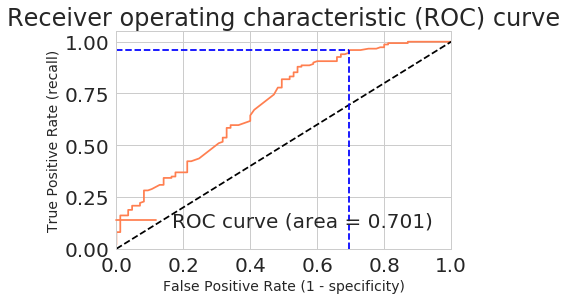

In [152]:

LR = LogisticRegression(C=0.1, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001)
show_performance_model(LR, X_train, y_train, X_test, y_test )

we are doing a better job now, but still is far to be awesome.  Let see, which feature is contributing now. 

Optimal number of features: 2
Selected features: ['Per_NO', 'Per_UNCERTAIN']


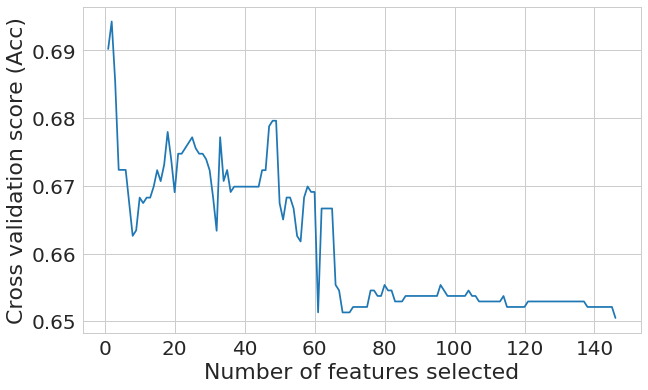

In [153]:
Xtotal = alldataset[sel_features]
ytotal = alldataset['Observed Attendance']

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(Xtotal, ytotal)
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(Xtotal.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (Acc)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

So,  the absence of permission  is a strong factor. I do not have a lot of hope it will do better, but just in case Let's do a quick try with another model, RF.

### Random Forest 

In [154]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

Train/Test split results:
RandomForestClassifier accuracy is 0.645
RandomForestClassifier log_loss is 0.716
RandomForestClassifier auc is 0.629
Using a threshold of 0.210 guarantees a sensitivity of 0.960 and a specificity of 0.176, i.e. a false positive rate of 82.35%.


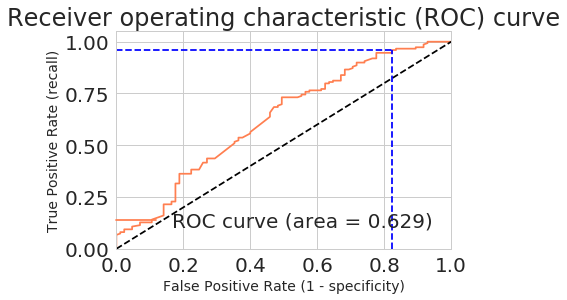

In [155]:
RF = RandomForestClassifier(n_estimators = 1000)
show_performance_model(RF, X_train, y_train, X_test, y_test )

I belive.  we can optimize the hyperparameters and improve  the performance of the model, however, the starting point is not promissing. However, I'am wondering which are the most important features according RF.

In [156]:
featlist = list(zip(sel_features, RF.feature_importances_))
featlist.sort(key=lambda x: x[1], reverse=True)
featlist

[('Marital Status', 0.083595589626886832),
 ('Gender', 0.082182406337554179),
 ('day', 0.052879294692608478),
 ('Per_YES', 0.04478141106247973),
 ('Per_NO', 0.0444308304775883),
 ('Cn_loc_CHENNAI', 0.038942097861862521),
 ('Cn_loc_HYDERABAD', 0.030722362517453621),
 ('Shl_YES', 0.022364084199463886),
 ('Al_YES', 0.020535718467781322),
 ('Per_NA', 0.019471551860448175),
 ('Cn_loc_CUTTACK', 0.014841066883935692),
 ('Mt_YES', 0.014523224608838509),
 ('Cn_loc_NAGERCOIL', 0.013441133002244882),
 ('W_4', 0.012860421832427528),
 ('Pr_YES', 0.012753174138889961),
 ('Itype_SCHEDULED ', 0.012005568716689653),
 ('Cn_loc_ALLAHABAD', 0.011753639994481731),
 ('W_1', 0.011630742370719968),
 ('Itype_SCHEDULED WALKIN', 0.011462662246256613),
 ('V_YES', 0.011407483249984423),
 ('Per_UNCERTAIN', 0.011093468645805423),
 ('Cn_loc_PUNE', 0.011070120806940732),
 ('Cn_loc_KOLKATA', 0.011062586751667247),
 ('W_5', 0.010535828771910486),
 ('Al_NO', 0.010227893897814465),
 ('M_4', 0.010166067935909604),
 ('M_2',

In [157]:
# last try
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

Train/Test split results:
GaussianNB accuracy is 0.449
GaussianNB log_loss is 7.897
GaussianNB auc is 0.671
Using a threshold of 0.000 guarantees a sensitivity of 0.953 and a specificity of 0.129, i.e. a false positive rate of 87.06%.


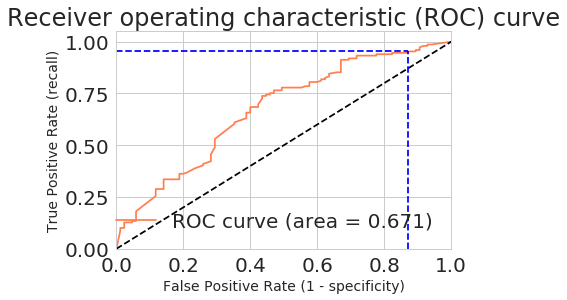

In [158]:
show_performance_model(gnb, X_train, y_train, X_test, y_test )

In [168]:
df = mldata[mldata['permission']!='NA']
df = pd.get_dummies(df, columns=cat, prefix=pref)

df.shape


(1024, 146)

Train/Test split results:
RandomForestClassifier accuracy is 0.725
RandomForestClassifier log_loss is 0.649
RandomForestClassifier auc is 0.700
Using a threshold of 0.331 guarantees a sensitivity of 0.951 and a specificity of 0.324, i.e. a false positive rate of 67.65%.


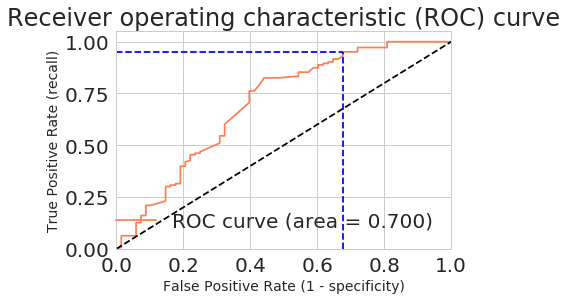

In [172]:
 # use same mask  than before
sel_features = list()
for c in df:
    if c in ['Date of Interview', 'skillset', 'Name(Cand ID)',   'Expected Attendance', 'Observed Attendance', 'weekday','month','year' ]:
        pass
    else:
        sel_features.append(c)

# I need a new mask
m = np.random.rand(len(df)) < 0.8
df['Observed Attendance'].replace({'YES':1,'NO':0}, inplace=True) 
train = df[m]
test = df[~m]

X_train = train[sel_features]
y_train = train['Observed Attendance']
X_test = test[sel_features]
y_test  = test['Observed Attendance']
#y = final_train['Survived']
LR = LogisticRegression(C=0.1, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001)
show_performance_model(RF, X_train, y_train, X_test, y_test )